# Scientific image visualization
For showing images in a more scientific way, there is the [microfilm library](https://github.com/guiwitz/microfilm). I supports convenient visualization of multi-channel images.

To get started, install microfilm using pip:
```
pip install microfilm
```

In [1]:
from skimage.data import cells3d
from microfilm.microplot import microshow
from skimage.filters import gaussian
import numpy as np

We demonstrate it using the [`cells3d` example dataset](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d) from scikit-image.

In [2]:
data = cells3d()
nuclei_image = data[30,1]
membrane_image = data[30,0]

The core function `microshow()` allows visualizing images, similar to `imshow` but with different options. First of all, we can use it without parameters to show an image.

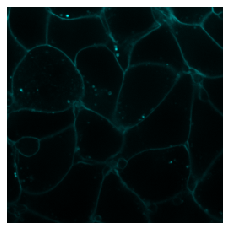

In [3]:
microshow(membrane_image)

## Brightness & contrast
We can control contrast limits (minimum and maximum shown intensity) using the `limits` parameter:

In [4]:
min_max = np.percentile(membrane_image, [1,99])
min_max

array([  766., 10681.])

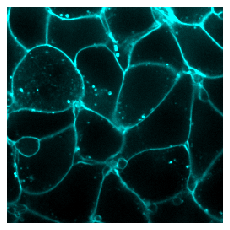

In [5]:
microshow(membrane_image, limits=min_max)

## Colorbars
We can also add a `colorbar` to inform the user about the shown intensity range.

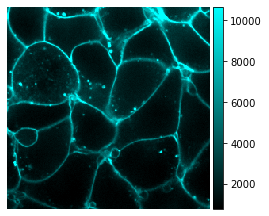

In [6]:
microshow(membrane_image, limits=np.percentile(membrane_image, [1,99]), show_colorbar=True)

## Multi-channel visualization
Multiple images can be combined like this.

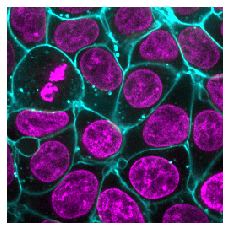

In [7]:
microshow([
            membrane_image, 
            nuclei_image
        ], limits=[
            np.percentile(membrane_image, [1,99]),
            np.percentile(nuclei_image, [1,99])
        ])

## Colormaps
The used default color maps can be changed by setting the `cmaps` parameter. It accepts [Matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and microfilm colormaps such as `pure_red`, `pure_green` etc.

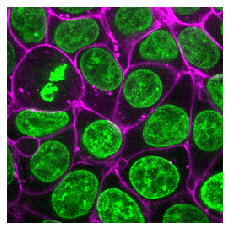

In [8]:
microshow([
            membrane_image, 
            nuclei_image
        ], limits=[
            np.percentile(membrane_image, [1,99]),
            np.percentile(nuclei_image, [1,99])
        ], cmaps=[
            'pure_magenta',
            'pure_green',
        ])

## Scalebars
You can also add a scalebar.

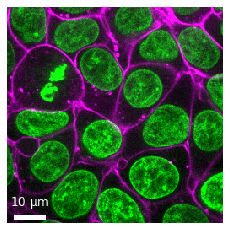

In [9]:
pixel_size_xy_in_micrometers = 0.26

microshow([
            membrane_image, 
            nuclei_image
        ], limits=[
            np.percentile(membrane_image, [1,99]),
            np.percentile(nuclei_image, [1,99])
        ], cmaps=[
            'pure_magenta',
            'pure_green',
        ], scalebar_thickness=0.02,
            scalebar_unit_per_pix=pixel_size_xy_in_micrometers,
            scalebar_size_in_units=10,
            unit='um',
            scalebar_location='lower left',
            scalebar_color='white',
            scalebar_font_size=12,
    )

